**Лабораторная работа №5**

Выполняли:


1. Алексеев Михаил Николаевич
2. Гурьянов Марк Владимирович
3. Ермаков Михаил Константинович
4. Карандашева Надежда Алексеевна
5. Юсупова Эдна Эдуардовна







Импортирование данных и библиотек

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import statistics
from scipy import stats

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1OrjwQWFLx4gM5yEr5UXo_ZkxOQHr7_Gv" -O data.txt

data =  pd.read_csv("data.txt", skiprows=list(range(4)), delimiter=',')


--2022-06-06 02:21:49--  https://drive.google.com/uc?export=download&id=1OrjwQWFLx4gM5yEr5UXo_ZkxOQHr7_Gv
Resolving drive.google.com (drive.google.com)... 173.194.215.138, 173.194.215.100, 173.194.215.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cves877j1s7bgbu5hqqdp1667npcend1/1654482075000/03267216146301025333/*/1OrjwQWFLx4gM5yEr5UXo_ZkxOQHr7_Gv?e=download [following]
--2022-06-06 02:21:50--  https://doc-10-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cves877j1s7bgbu5hqqdp1667npcend1/1654482075000/03267216146301025333/*/1OrjwQWFLx4gM5yEr5UXo_ZkxOQHr7_Gv?e=download
Resolving doc-10-2c-docs.googleusercontent.com (doc-10-2c-docs.googleusercontent.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to doc-10-2c-docs.googleusercontent.com (doc-10-2c

Выведем заголовки столбцов

In [ ]:
data.columns

Index(['Sample Index', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
       ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6',
       ' EXG Channel 7', ' Accel Channel 0', ' Accel Channel 1',
       ' Accel Channel 2', ' Other', ' Other.1', ' Other.2', ' Other.3',
       ' Other.4', ' Other.5', ' Other.6', ' Analog Channel 0',
       ' Analog Channel 1', ' Analog Channel 2', ' Timestamp', ' Other.7',
       ' Timestamp (Formatted)'],
      dtype='object')

Создаем фрейм данных из датасета, загруженного ранее

In [ ]:
df = pd.DataFrame()
df['ECG Channel 0'] = data[' EXG Channel 0']
df['ECG Channel 1'] = data[' EXG Channel 1']
df['ECG Channel 2'] = data[' EXG Channel 2']
df['Timestamp'] = data[' Timestamp']

Удалим первую строк и выбросы

In [ ]:
df = df.drop(df[df['ECG Channel 0'] == 0].index)

In [ ]:
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,ECG Channel 0,ECG Channel 1,ECG Channel 2,Timestamp
147,-6023.169282,-4634.813027,-6797.500765,1.654078e+09
148,-6086.558829,-4684.970341,-6811.716474,1.654078e+09
198,-6066.621073,-4780.412290,-6761.916788,1.654078e+09
202,-6091.587972,-4808.888413,-6882.102118,1.654078e+09
222,-5970.575627,-4690.133594,-6903.380979,1.654078e+09
...,...,...,...,...
78999,-1300.133920,-1103.259755,-2915.427436,1.654078e+09
79000,-1277.536306,-1124.091580,-3643.311994,1.654078e+09
79001,-1271.948370,-1118.302479,-3499.746740,1.654078e+09
79002,-1300.558603,-1120.045915,-3079.511592,1.654078e+09


График для первого отведения

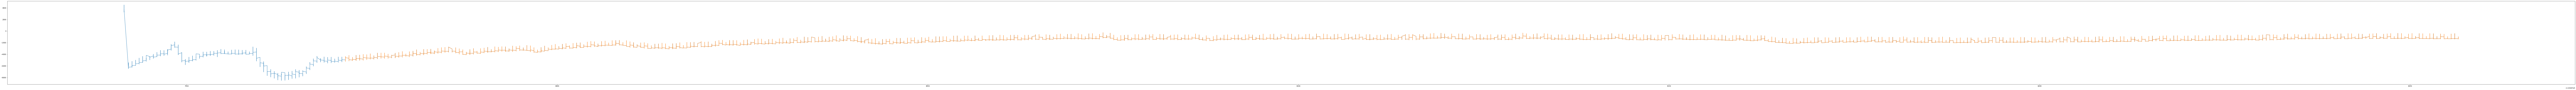

In [ ]:
plt.figure(figsize = (300,10))
plt.plot(df['Timestamp'], df['ECG Channel 0'])
plt.plot(df['Timestamp'][7500:], df['ECG Channel 0'][7500:])

График для второго отведения

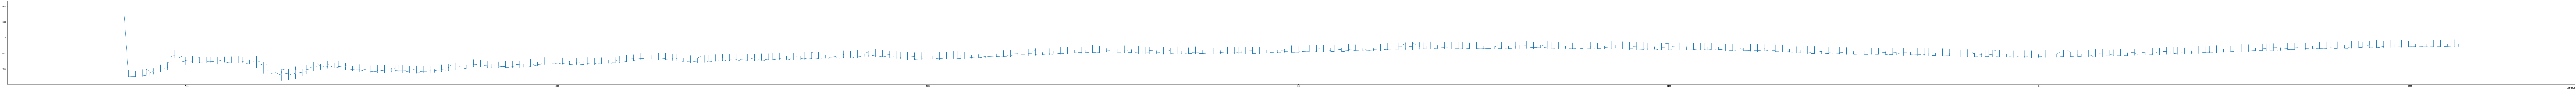

In [ ]:
plt.figure(figsize = (300,10))
plt.plot(df['Timestamp'], df['ECG Channel 1'])

График для третьего отведения

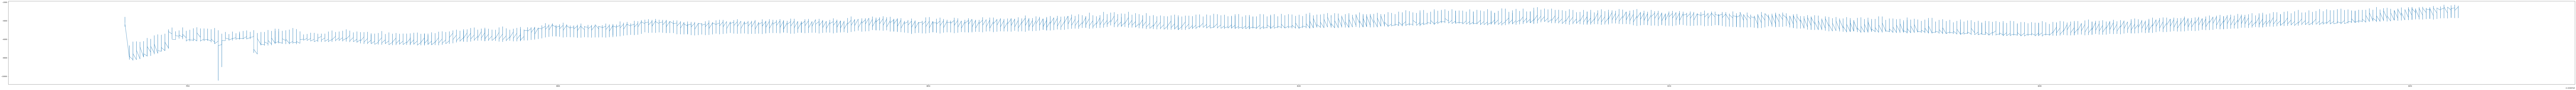

In [ ]:
plt.figure(figsize = (300,10))
plt.plot(df['Timestamp'], df['ECG Channel 2'])

Рассчитываем среднее скользящее,а также обрезаем данные для улучшения результатов обработки

In [ ]:
def running_mean(a, n = 300) :
    ret = np.cumsum(a, dtype = float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n :] / n

In [ ]:
df_new = df[8000:].copy(deep=False).reset_index(drop=True)
df_new['Timestamp'] -= df_new['Timestamp'][0]

In [ ]:
time = df_new['Timestamp'][0:-300]
y0 = df_new['ECG Channel 0'].to_list()
y = []
y.append(df_new['ECG Channel 0'].to_list())
y.append(df_new['ECG Channel 1'].to_list())
y.append(df_new['ECG Channel 2'].to_list())
run_mean = [running_mean(y[i]) for i in range(3)]
y_new = [y[i][150:-150] - run_mean[i] for i in range(3)]

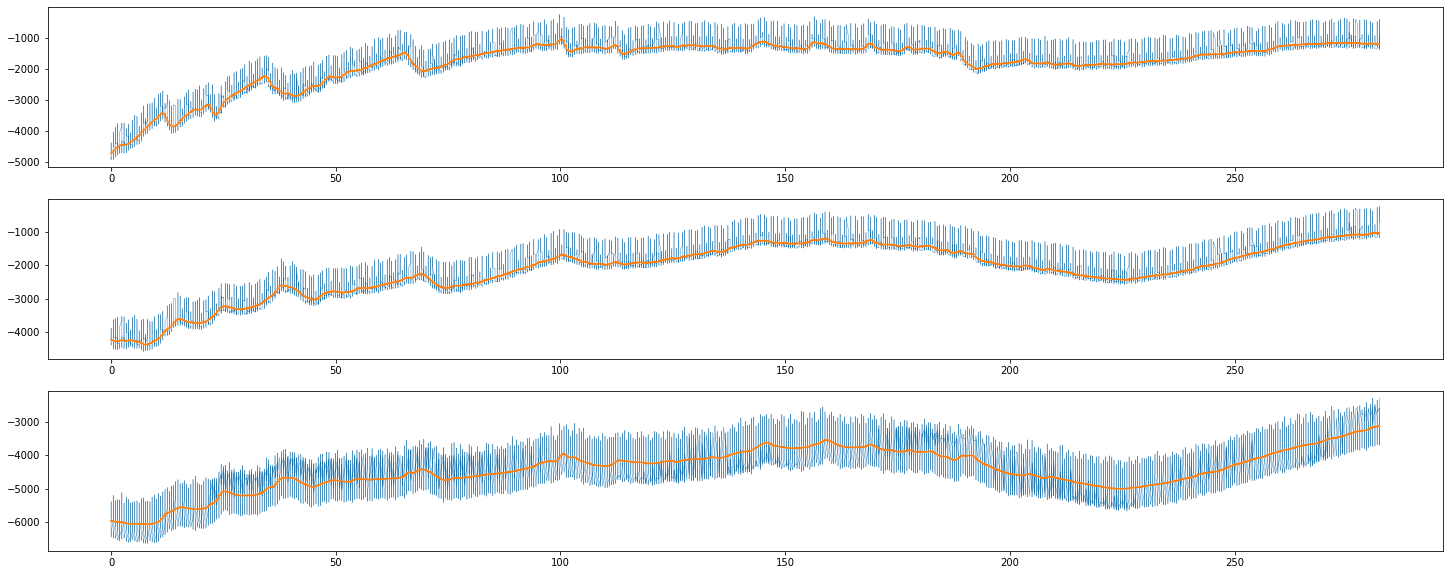

In [ ]:
fig, axs = plt.subplots(3,1)
fig.set_size_inches(25, 10, forward=True)
for i in range(3):
  axs[i].plot(time, y[i][150:-150],linewidth = 0.4)
  axs[i].plot(time,run_mean[i])

Найдем R-зубцы ЭКГ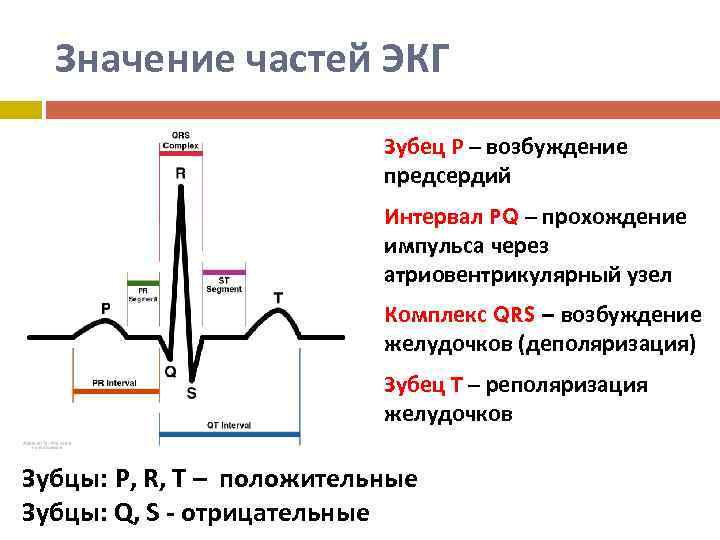

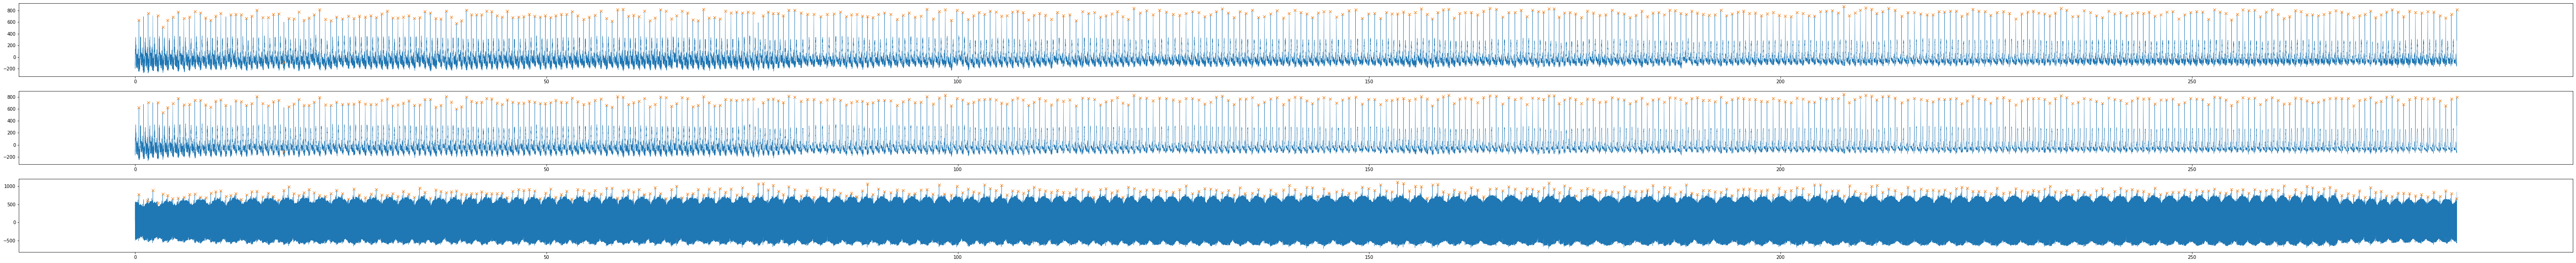

In [ ]:
time_new = np.linspace(time[0], time[len(time)-1], len(time))
peaks = [find_peaks(y_new[i], distance = 150)[0] for i in range(3)]
fig, axs = plt.subplots(3,1)
fig.set_size_inches(100, 10, forward=True)

for i in range(3):
  axs[i].plot(time_new, y_new[i],linewidth = 0.5)
  axs[i].plot(time_new[peaks[i]], y_new[i][peaks[i]], "x")

Сопоставим зубцы трех отведений

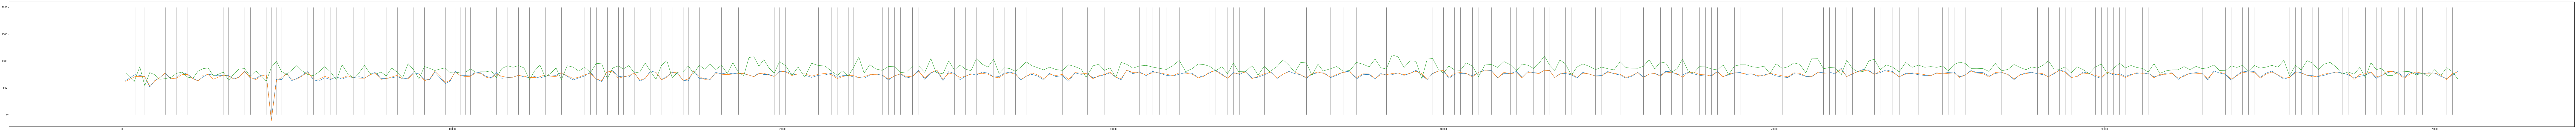

In [ ]:
fig, ax = plt.subplots(figsize = [200, 10])
ax.plot(peaks[0], y_new[0][peaks[0]])
ax.plot(peaks[1], y_new[1][peaks[1]])
ax.plot(peaks[2], y_new[2][peaks[2]])
ax.vlines(peaks[0], 0, 2000, linewidth = 0.5)

Оказалось, что они практически полностью совпадают => 
 мы можем использовать данные с первого отведения
в качестве входных для последующих вычислений



---



Основной параметр для дальнейших рассчетов - PR-интервалы

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

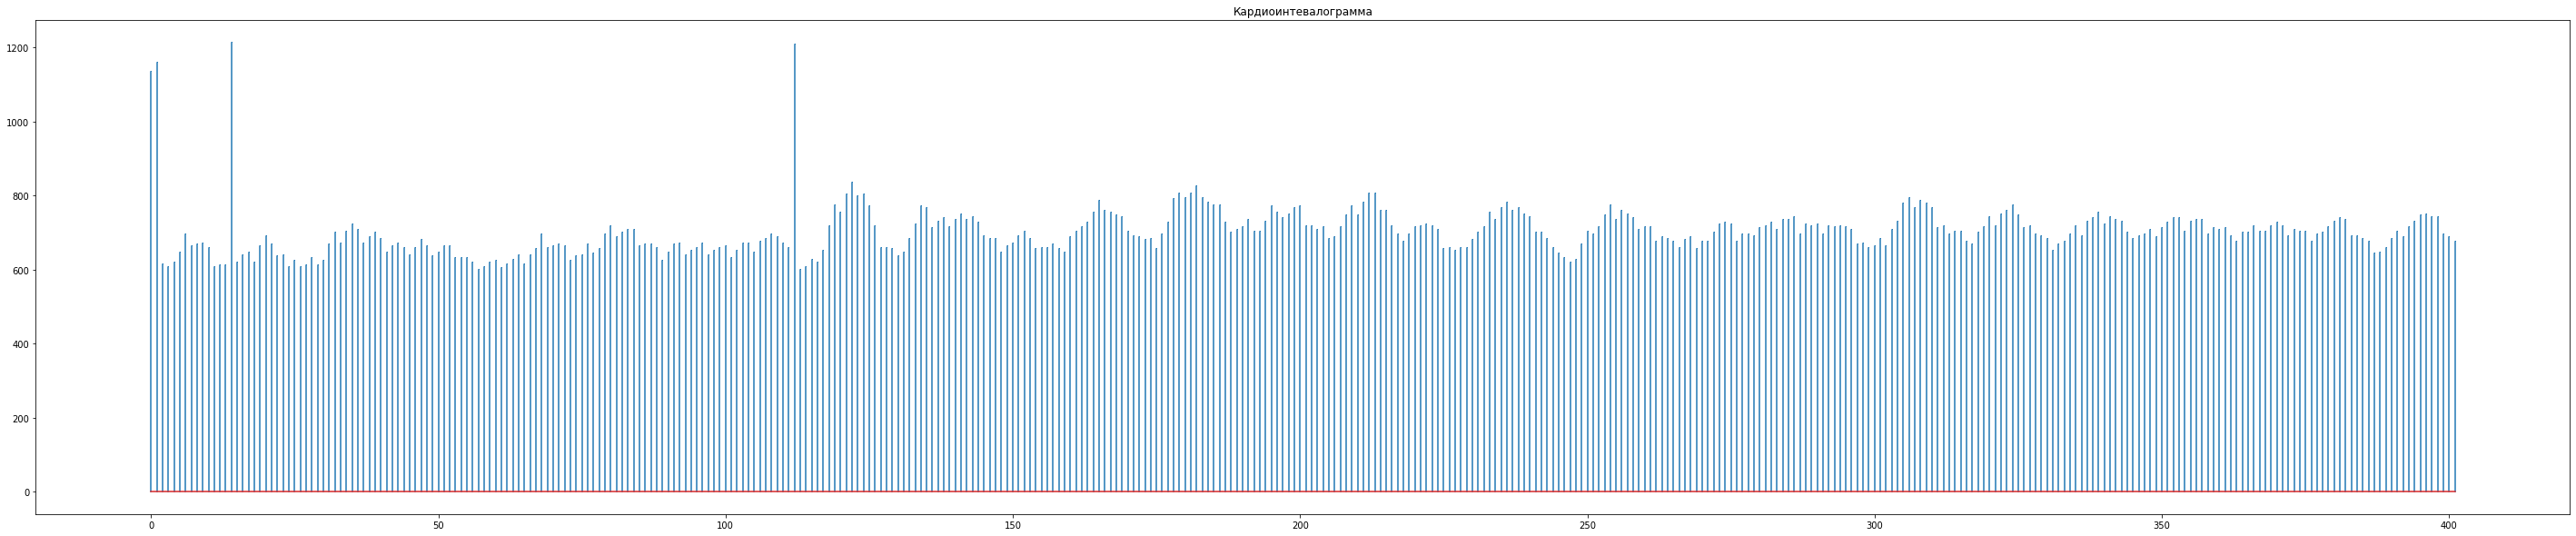

In [ ]:
pr=[round(1000*(time_new[peaks[0][i+1]]-time_new[peaks[0][i]])) for i in range(len(peaks[0])-1)]
N=len(pr)
plt.figure(figsize=(50, 10))
plt.title('Кардиоинтевалограмма')
plt.stem(pr, markerfmt=',')


Вычислим пульс и другие показатели

In [ ]:
pulse = 60 * 1000 / pd.DataFrame(pr)[0].mean()
p = pd.DataFrame(pr)[0]
mean = p.mean()
st = p.std(ddof = 0)
koef_var = st / mean * 100

print('Пульс: ', pulse)
print('Среднее значение: ', mean)
print('Отклонение стандартное: ', st)
print('Коэффициент вариации: ', koef_var)

Пульс:  85.59626385793575
Среднее значение:  700.9651741293533
Отклонение стандартное:  66.53158290223631
Коэффициент вариации:  9.491424874976575


Распределение PR интервалов



Минимум = 599
Максимум = 1213



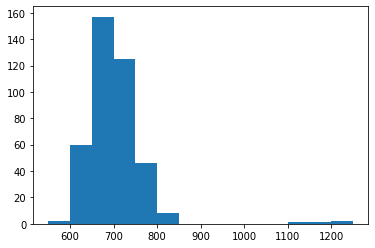

Проверка:
Для интервала 550-600 количество значений = 2
Для интервала 600-650 количество значений = 60
Для интервала 650-700 количество значений = 157
Для интервала 700-750 количество значений = 125
Для интервала 750-800 количество значений = 46
Для интервала 800-850 количество значений = 8
Для интервала 850-900 количество значений = 0
Для интервала 900-950 количество значений = 0
Для интервала 950-1000 количество значений = 0
Для интервала 1000-1050 количество значений = 0
Для интервала 1050-1100 количество значений = 0
Для интервала 1100-1150 количество значений = 1
Для интервала 1150-1200 количество значений = 1
Для интервала 1200-1250 количество значений = 2


In [ ]:
minimum = int(p.min() // 50 * 50)
maximum = int(p.max() // 50 * 50)
vals = []
amounts = []
print(f'Минимум = {p.min()}\nМаксимум = {p.max()}\n')
for i in range (minimum, maximum+50, 50):
        amounts.append(p.where(p >= i).where(p<i+50).count())
        vals.append(i)
vals.append(maximum+50)
plt.hist(x = p, bins = vals)
plt.show()
print('Проверка:')
for i in range(len(amounts)):
        print(f'Для интервала {vals[i]}-{vals[i+1]} количество значений = {amounts[i]}')

Рассчитаем индекс напряженности

In [ ]:
AM0 = 157 / 402 * 100 #амплитуда моды
M0 = 0.675 #мода
var = (1213 - 599 ) / 1000 #вариационный размах

stress = AM0 / (2 * M0 * var)
print('Индекс напряженности = ', stress)

Индекс напряженности =  47.11633052015828


График автокорреляции

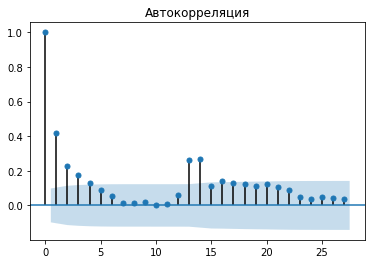

In [ ]:
rr_ECG = pd.Series(p[0:(len(p))-1])
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rr_ECG)
plt.title('Автокорреляция')
plt.show()

Теперь поймем, действительно ли сердце исследуемого здорово и работает в нормальном режиме. Для этого построим скаттерограмму. Если точки будут равномерно расположены с двух сторон линии, то это будет означать, что все хорошо.

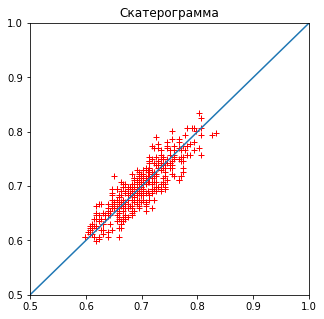

In [ ]:
n = len(p)
plt.figure(figsize=(5,5))
plt.plot(p[0:n-1:]/1000,p[1:n:]/1000,'r+')
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.plot([0,5], [0,5])
plt.title('Скатерограмма')
plt.show()

**Вывод**

В результате выполнения лабораторной работы мы пришли к выводу, что исследуемый человек во время испытаний находился в состоянии покоя, так как индекс напряженности соответствует нормальным значениям, как и пульс. Кроме того, его сердце скорее всего здорово, потому что точки на скатерограмме находятся в области, ограничеваемой воображаемым эллипсом.